In [96]:
%pip install graphviz

                                              0.0/47.1 kB ? eta -:--:--
     ---------------------------------------- 47.1/47.1 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt

C:\Users\daniel\AppData\Local\Temp\ipykernel_13520\1311984906.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [3]:
# import training and validating dataset
training_df = pd.read_csv(os.path.join(os.path.abspath(""), '../datasets/merged/training_dataset.csv'))

In [4]:
val_df = pd.read_csv(os.path.join(os.path.abspath(""), '../datasets/merged/validate_dataset.csv')) 

In [5]:
training_df.drop(['Unnamed: 0'],axis=1,inplace=True)
training_df.head()

Date_ID  Month  NumberOfDaysInMonth  Quarter  Year  LeapYear  \
0       88      5                   31        2  2008         1   
1       32      9                   30        3  2003         0   
2       35     12                   31        4  2003         0   
3       94     11                   30        4  2008         1   
4       62      3                   31        1  2006         0   

   Minimum Temperature  Maximum Temperature  Barley  Canola  ...  Quebec  \
0                    3                   29   False    True  ...    True   
1                    5                   30   False   False  ...   False   
2                    5                   34   False   False  ...   False   
3                    3                   29   False    True  ...   False   
4                    5                   34   False   False  ...   False   

   Saskatchewan  Territories  Yukon  Atlantic_Region  British Columbia_Region  \
0         False        False  False            False                    False   
1         False        False  False            False                    False   
2         False        False  False            False                     True   
3          True        False  False            False                    False   
4          True        False  False            False                    False   

   Canada_Region  Prairies_Region  Territories_Region  Total_Value  
0           True            False               False            1  
1          False             True               False            1  
2          False            False               False            1  
3          False             True               False            2  
4          False             True               False            1  

[5 rows x 76 columns]

In [6]:
X_train = training_df.drop('Total_Value',axis=1)
X_train.head()

Date_ID  Month  NumberOfDaysInMonth  Quarter  Year  LeapYear  \
0       88      5                   31        2  2008         1   
1       32      9                   30        3  2003         0   
2       35     12                   31        4  2003         0   
3       94     11                   30        4  2008         1   
4       62      3                   31        1  2006         0   

   Minimum Temperature  Maximum Temperature  Barley  Canola  ...  \
0                    3                   29   False    True  ...   
1                    5                   30   False   False  ...   
2                    5                   34   False   False  ...   
3                    3                   29   False    True  ...   
4                    5                   34   False   False  ...   

   Prince Edward Island  Quebec  Saskatchewan  Territories  Yukon  \
0                 False    True         False        False  False   
1                 False   False         False        False  False   
2                 False   False         False        False  False   
3                 False   False          True        False  False   
4                 False   False          True        False  False   

   Atlantic_Region  British Columbia_Region  Canada_Region  Prairies_Region  \
0            False                    False           True            False   
1            False                    False          False             True   
2            False                     True          False            False   
3            False                    False          False             True   
4            False                    False          False             True   

   Territories_Region  
0               False  
1               False  
2               False  
3               False  
4               False  

[5 rows x 75 columns]

In [7]:
y_train = training_df['Total_Value']
y_train.head()

0    1
1    1
2    1
3    2
4    1
Name: Total_Value, dtype: int64

In [8]:
X_val = val_df.drop(['Unnamed: 0','Total_Value'],axis=1)

In [9]:
y_val = val_df['Total_Value'] 

In [57]:
X_val.head()

Date_ID  Month  NumberOfDaysInMonth  Quarter  Year  LeapYear  \
0      105     10                   31        4  2009         0   
1       85      2                   29        1  2008         1   
2      241      2                   28        1  2021         0   
3      186      7                   31        3  2016         1   
4      215     12                   31        4  2018         0   

   Minimum Temperature  Maximum Temperature  Barley  Canola  ...  \
0                    5                   28    True   False  ...   
1                    5                   28    True   False  ...   
2                    5                   28   False   False  ...   
3                    5                   30   False   False  ...   
4                    5                   34   False   False  ...   

   Prince Edward Island  Quebec  Saskatchewan  Territories  Yukon  \
0                 False   False         False        False  False   
1                 False   False         False        False  False   
2                 False   False         False        False  False   
3                 False   False         False        False  False   
4                 False   False         False        False  False   

   Atlantic_Region  British Columbia_Region  Canada_Region  Prairies_Region  \
0            False                    False           True            False   
1            False                    False          False             True   
2            False                    False           True            False   
3            False                    False          False             True   
4            False                    False          False             True   

   Territories_Region  
0               False  
1               False  
2               False  
3               False  
4               False  

[5 rows x 75 columns]

In [58]:
y_val.head()

0    1
1    1
2    1
3    1
4    1
Name: Total_Value, dtype: int64

In [12]:
def compute_metrics(labels,predictions):

  accuracy = accuracy_score(labels, predictions)
  precision = precision_score(labels, predictions, average='weighted')
  recall = recall_score(labels, predictions, average='weighted')
  f1 = f1_score(labels, predictions, average='weighted')

  print("ACCURACY: " + str(accuracy))
  print("PRECISION: " + str(precision))
  print("RECALL: " + str(recall))
  print("F1: " + str(f1))

  return accuracy, precision, recall, f1

In [60]:
start = time.time()
classifier = RandomForestClassifier(n_estimators = 1000,random_state = 42,criterion='gini',max_depth=25)
classifier.fit(X_train, y_train)
end = time.time()

print("TRAINED")
y_pred = classifier.predict(X_val)
accuracy, precision, recall, f1 = compute_metrics(y_val, y_pred)
print("TESTED")

print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

TRAINED
ACCURACY: 0.9347280334728033
PRECISION: 0.9302025020815768
RECALL: 0.9347280334728033
F1: 0.930517630768443
TESTED
[[1058    9    0    0    0    0    0    0    0]
 [  23   39   10    0    0    0    0    0    0]
 [   0   13   13    3    0    0    0    0    0]
 [   0    5    3    5    0    0    0    0    0]
 [   0    1    2    2    1    0    1    0    0]
 [   0    1    1    3    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    1    0    0]
 [   0    0    0    0    0    0    0    0    1]]
              precision    recall  f1-score   support

           1       0.98      0.99      0.99      1067
           2       0.57      0.54      0.56        72
           3       0.45      0.45      0.45        29
           4       0.38      0.38      0.38        13
           5       1.00      0.14      0.25         7
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         0
           

c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

In [61]:
results = []

In [62]:
# preventing overfitting by using max_depth
criteria = ["gini","entropy"]

for i in range(5,50,5):
    for criterion in criteria:

            start = time.time()
            print("RF","Max Depth",str(i),criterion)
            classifier = RandomForestClassifier(n_estimators = 1000,random_state = 42,criterion=criterion,max_depth=i)
            classifier.fit(X_train, y_train)
            end = time.time()
            training_time = end - start

            print("TRAINED")
            y_pred = classifier.predict(X_val)
            accuracy, precision, recall, f1 = compute_metrics(y_val, y_pred)
            print("TESTED")
            results.append([criterion,i,accuracy,precision,recall,f1,training_time])



RF Max Depth 5 gini
TRAINED
ACCURACY: 0.9046025104602511
PRECISION: 0.849567433927659
RECALL: 0.9046025104602511
F1: 0.8687724596276749
TESTED
RF Max Depth 5 entropy


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.8928870292887029
PRECISION: 0.797247247072005
RECALL: 0.8928870292887029
F1: 0.8423611496472555
TESTED
RF Max Depth 10 gini


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9389121338912134
PRECISION: 0.9304956530602604
RECALL: 0.9389121338912134
F1: 0.9324828006516415
TESTED
RF Max Depth 10 entropy


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9389121338912134
PRECISION: 0.9312394567675318
RECALL: 0.9389121338912134
F1: 0.9329590108739756
TESTED
RF Max Depth 15 gini


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9330543933054394
PRECISION: 0.9282751740335007
RECALL: 0.9330543933054394
F1: 0.928693263824034
TESTED
RF Max Depth 15 entropy


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ACCURACY: 0.9355648535564853
PRECISION: 0.9310888076573951
RECALL: 0.9355648535564853
F1: 0.9313506433199195
TESTED
RF Max Depth 20 gini
TRAINED


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ACCURACY: 0.9322175732217574
PRECISION: 0.9270492802244444
RECALL: 0.9322175732217574
F1: 0.9276390673982848
TESTED
RF Max Depth 20 entropy
TRAINED


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ACCURACY: 0.9364016736401674
PRECISION: 0.9326867054566063
RECALL: 0.9364016736401674
F1: 0.9326146619824793
TESTED
RF Max Depth 25 gini
TRAINED


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ACCURACY: 0.9347280334728033
PRECISION: 0.9302025020815768
RECALL: 0.9347280334728033
F1: 0.930517630768443
TESTED
RF Max Depth 25 entropy
TRAINED


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ACCURACY: 0.9364016736401674
PRECISION: 0.9322673310020956
RECALL: 0.9364016736401674
F1: 0.9324035542027572
TESTED
RF Max Depth 30 gini
TRAINED


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ACCURACY: 0.9347280334728033
PRECISION: 0.9302025020815768
RECALL: 0.9347280334728033
F1: 0.930517630768443
TESTED
RF Max Depth 30 entropy
TRAINED


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ACCURACY: 0.9364016736401674
PRECISION: 0.9322673310020956
RECALL: 0.9364016736401674
F1: 0.9324035542027572
TESTED
RF Max Depth 35 gini
TRAINED


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ACCURACY: 0.9347280334728033
PRECISION: 0.9302025020815768
RECALL: 0.9347280334728033
F1: 0.930517630768443
TESTED
RF Max Depth 35 entropy
TRAINED


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ACCURACY: 0.9364016736401674
PRECISION: 0.9322673310020956
RECALL: 0.9364016736401674
F1: 0.9324035542027572
TESTED
RF Max Depth 40 gini
TRAINED


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ACCURACY: 0.9347280334728033
PRECISION: 0.9302025020815768
RECALL: 0.9347280334728033
F1: 0.930517630768443
TESTED
RF Max Depth 40 entropy
TRAINED


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ACCURACY: 0.9364016736401674
PRECISION: 0.9322673310020956
RECALL: 0.9364016736401674
F1: 0.9324035542027572
TESTED
RF Max Depth 45 gini
TRAINED


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ACCURACY: 0.9347280334728033
PRECISION: 0.9302025020815768
RECALL: 0.9347280334728033
F1: 0.930517630768443
TESTED
RF Max Depth 45 entropy
TRAINED
ACCURACY: 0.9364016736401674
PRECISION: 0.9322673310020956
RECALL: 0.9364016736401674
F1: 0.9324035542027572
TESTED


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [63]:
len(results) 

18

In [64]:
results_df = pd.DataFrame(results,columns=['criterion','max_depth / min_samples','accuracy', 'precision', 'recall', 'f1','training_time'])
results_df['Technique'] = 'max_depth'
results_df.head(50)

criterion  max_depth / min_samples  accuracy  precision    recall  \
0       gini                        5  0.904603   0.849567  0.904603   
1    entropy                        5  0.892887   0.797247  0.892887   
2       gini                       10  0.938912   0.930496  0.938912   
3    entropy                       10  0.938912   0.931239  0.938912   
4       gini                       15  0.933054   0.928275  0.933054   
5    entropy                       15  0.935565   0.931089  0.935565   
6       gini                       20  0.932218   0.927049  0.932218   
7    entropy                       20  0.936402   0.932687  0.936402   
8       gini                       25  0.934728   0.930203  0.934728   
9    entropy                       25  0.936402   0.932267  0.936402   
10      gini                       30  0.934728   0.930203  0.934728   
11   entropy                       30  0.936402   0.932267  0.936402   
12      gini                       35  0.934728   0.930203  0.934728   
13   entropy                       35  0.936402   0.932267  0.936402   
14      gini                       40  0.934728   0.930203  0.934728   
15   entropy                       40  0.936402   0.932267  0.936402   
16      gini                       45  0.934728   0.930203  0.934728   
17   entropy                       45  0.936402   0.932267  0.936402   

          f1  training_time  Technique  
0   0.868772       5.949321  max_depth  
1   0.842361       5.797978  max_depth  
2   0.932483       6.289586  max_depth  
3   0.932959       6.710685  max_depth  
4   0.928693       7.247636  max_depth  
5   0.931351       8.019932  max_depth  
6   0.927639       7.596372  max_depth  
7   0.932615       8.373363  max_depth  
8   0.930518       7.629860  max_depth  
9   0.932404       8.280433  max_depth  
10  0.930518       7.769773  max_depth  
11  0.932404       8.380329  max_depth  
12  0.930518       7.717550  max_depth  
13  0.932404       8.330590  max_depth  
14  0.930518       7.540582  max_depth  
15  0.932404       8.426055  max_depth  
16  0.930518       7.712298  max_depth  
17  0.932404       8.329366  max_depth

In [65]:
# preventing overfitting by using min_samples
results_min_samples = []

for i in range(5,50,5):
    for criterion in criteria:
            start = time.time()
            print("RF","Min Samples Split",str(i),criterion)
            classifier = RandomForestClassifier(n_estimators = 1000,random_state = 42,criterion=criterion,min_samples_split=i)
            classifier.fit(X_train, y_train)
            end = time.time()
            training_time = end - start

            print("TRAINED")
            y_pred = classifier.predict(X_val)
            accuracy, precision, recall, f1 = compute_metrics(y_val, y_pred)
            print("TESTED")
            results_min_samples.append([criterion,i,accuracy,precision,recall,f1,training_time,"Min Samples Split"])
            
            

RF Min Samples Split 5 gini
TRAINED


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


ACCURACY: 0.9347280334728033
PRECISION: 0.9268497547584745
RECALL: 0.9347280334728033
F1: 0.9301122757409624
TESTED
RF Min Samples Split 5 entropy
TRAINED
ACCURACY: 0.9347280334728033
PRECISION: 0.9300823703468746
RECALL: 0.9347280334728033
F1: 0.9304335293013862
TESTED
RF Min Samples Split 10 gini


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9372384937238494
PRECISION: 0.9300959101587757
RECALL: 0.9372384937238494
F1: 0.9315667746886244
TESTED
RF Min Samples Split 10 entropy


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9364016736401674
PRECISION: 0.9307461132191409
RECALL: 0.9364016736401674
F1: 0.9316213443483943
TESTED
RF Min Samples Split 15 gini


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9380753138075314
PRECISION: 0.9297530018696147
RECALL: 0.9380753138075314
F1: 0.9315841163287089
TESTED
RF Min Samples Split 15 entropy


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9389121338912134
PRECISION: 0.931032244175382
RECALL: 0.9389121338912134
F1: 0.9328438927672257
TESTED
RF Min Samples Split 20 gini


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9380753138075314
PRECISION: 0.929155964415397
RECALL: 0.9380753138075314
F1: 0.931254602776327
TESTED
RF Min Samples Split 20 entropy


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9389121338912134
PRECISION: 0.9307684109208536
RECALL: 0.9389121338912134
F1: 0.9327026754765441
TESTED
RF Min Samples Split 25 gini


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9364016736401674
PRECISION: 0.9282322615238564
RECALL: 0.9364016736401674
F1: 0.9299668126658419
TESTED
RF Min Samples Split 25 entropy


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9355648535564853
PRECISION: 0.9270428815548406
RECALL: 0.9355648535564853
F1: 0.9291824925419019
TESTED
RF Min Samples Split 30 gini


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9389121338912134
PRECISION: 0.931141540932336
RECALL: 0.9389121338912134
F1: 0.9323780878860937
TESTED
RF Min Samples Split 30 entropy


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9364016736401674
PRECISION: 0.9280108629419997
RECALL: 0.9364016736401674
F1: 0.9299471948754725
TESTED
RF Min Samples Split 35 gini


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9372384937238494
PRECISION: 0.9280980023028673
RECALL: 0.9372384937238494
F1: 0.9298918594778951
TESTED
RF Min Samples Split 35 entropy


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9372384937238494
PRECISION: 0.9277684945257594
RECALL: 0.9372384937238494
F1: 0.9301176668755348
TESTED
RF Min Samples Split 40 gini


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9364016736401674
PRECISION: 0.9215274583093874
RECALL: 0.9364016736401674
F1: 0.9280286037801171
TESTED
RF Min Samples Split 40 entropy


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9338912133891213
PRECISION: 0.9180264700961412
RECALL: 0.9338912133891213
F1: 0.9252857290446495
TESTED
RF Min Samples Split 45 gini


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9322175732217574
PRECISION: 0.9156094660453761
RECALL: 0.9322175732217574
F1: 0.9225564209019258
TESTED
RF Min Samples Split 45 entropy


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TRAINED
ACCURACY: 0.9330543933054394
PRECISION: 0.9165394472790231
RECALL: 0.9330543933054394
F1: 0.9239633582386242
TESTED


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [66]:
results_min_samples_df = pd.DataFrame(results_min_samples,columns=['criterion','max_depth / min_samples','accuracy', 'precision', 'recall', 'f1','training_time','Technique'])
results_min_samples_df.head()

criterion  max_depth / min_samples  accuracy  precision    recall        f1  \
0      gini                        5  0.934728   0.926850  0.934728  0.930112   
1   entropy                        5  0.934728   0.930082  0.934728  0.930434   
2      gini                       10  0.937238   0.930096  0.937238  0.931567   
3   entropy                       10  0.936402   0.930746  0.936402  0.931621   
4      gini                       15  0.938075   0.929753  0.938075  0.931584   

   training_time          Technique  
0       7.993715  Min Samples Split  
1       7.562238  Min Samples Split  
2       7.110659  Min Samples Split  
3       7.174195  Min Samples Split  
4       6.025946  Min Samples Split

In [67]:
all_results_df = pd.concat([results_df,results_min_samples_df]).reset_index()
all_results_df.head(40)

index criterion  max_depth / min_samples  accuracy  precision    recall  \
0       0      gini                        5  0.904603   0.849567  0.904603   
1       1   entropy                        5  0.892887   0.797247  0.892887   
2       2      gini                       10  0.938912   0.930496  0.938912   
3       3   entropy                       10  0.938912   0.931239  0.938912   
4       4      gini                       15  0.933054   0.928275  0.933054   
5       5   entropy                       15  0.935565   0.931089  0.935565   
6       6      gini                       20  0.932218   0.927049  0.932218   
7       7   entropy                       20  0.936402   0.932687  0.936402   
8       8      gini                       25  0.934728   0.930203  0.934728   
9       9   entropy                       25  0.936402   0.932267  0.936402   
10     10      gini                       30  0.934728   0.930203  0.934728   
11     11   entropy                       30  0.936402   0.932267  0.936402   
12     12      gini                       35  0.934728   0.930203  0.934728   
13     13   entropy                       35  0.936402   0.932267  0.936402   
14     14      gini                       40  0.934728   0.930203  0.934728   
15     15   entropy                       40  0.936402   0.932267  0.936402   
16     16      gini                       45  0.934728   0.930203  0.934728   
17     17   entropy                       45  0.936402   0.932267  0.936402   
18      0      gini                        5  0.934728   0.926850  0.934728   
19      1   entropy                        5  0.934728   0.930082  0.934728   
20      2      gini                       10  0.937238   0.930096  0.937238   
21      3   entropy                       10  0.936402   0.930746  0.936402   
22      4      gini                       15  0.938075   0.929753  0.938075   
23      5   entropy                       15  0.938912   0.931032  0.938912   
24      6      gini                       20  0.938075   0.929156  0.938075   
25      7   entropy                       20  0.938912   0.930768  0.938912   
26      8      gini                       25  0.936402   0.928232  0.936402   
27      9   entropy                       25  0.935565   0.927043  0.935565   
28     10      gini                       30  0.938912   0.931142  0.938912   
29     11   entropy                       30  0.936402   0.928011  0.936402   
30     12      gini                       35  0.937238   0.928098  0.937238   
31     13   entropy                       35  0.937238   0.927768  0.937238   
32     14      gini                       40  0.936402   0.921527  0.936402   
33     15   entropy                       40  0.933891   0.918026  0.933891   
34     16      gini                       45  0.932218   0.915609  0.932218   
35     17   entropy                       45  0.933054   0.916539  0.933054   

          f1  training_time          Technique  
0   0.868772       5.949321          max_depth  
1   0.842361       5.797978          max_depth  
2   0.932483       6.289586          max_depth  
3   0.932959       6.710685          max_depth  
4   0.928693       7.247636          max_depth  
5   0.931351       8.019932          max_depth  
6   0.927639       7.596372          max_depth  
7   0.932615       8.373363          max_depth  
8   0.930518       7.629860          max_depth  
9   0.932404       8.280433          max_depth  
10  0.930518       7.769773          max_depth  
11  0.932404       8.380329          max_depth  
12  0.930518       7.717550          max_depth  
13  0.932404       8.330590          max_depth  
14  0.930518       7.540582          max_depth  
15  0.932404       8.426055          max_depth  
16  0.930518       7.712298          max_depth  
17  0.932404       8.329366          max_depth  
18  0.930112       7.993715  Min Samples Split  
19  0.930434       7.562238  Min Samples Split  
20  0.931567       7.110659  Min Samples Split  
21

In [69]:
all_results_df.to_csv("random_forest_finetuning.csv")
all_results_df

index criterion  max_depth / min_samples  accuracy  precision    recall  \
0       0      gini                        5  0.904603   0.849567  0.904603   
1       1   entropy                        5  0.892887   0.797247  0.892887   
2       2      gini                       10  0.938912   0.930496  0.938912   
3       3   entropy                       10  0.938912   0.931239  0.938912   
4       4      gini                       15  0.933054   0.928275  0.933054   
5       5   entropy                       15  0.935565   0.931089  0.935565   
6       6      gini                       20  0.932218   0.927049  0.932218   
7       7   entropy                       20  0.936402   0.932687  0.936402   
8       8      gini                       25  0.934728   0.930203  0.934728   
9       9   entropy                       25  0.936402   0.932267  0.936402   
10     10      gini                       30  0.934728   0.930203  0.934728   
11     11   entropy                       30  0.936402   0.932267  0.936402   
12     12      gini                       35  0.934728   0.930203  0.934728   
13     13   entropy                       35  0.936402   0.932267  0.936402   
14     14      gini                       40  0.934728   0.930203  0.934728   
15     15   entropy                       40  0.936402   0.932267  0.936402   
16     16      gini                       45  0.934728   0.930203  0.934728   
17     17   entropy                       45  0.936402   0.932267  0.936402   
18      0      gini                        5  0.934728   0.926850  0.934728   
19      1   entropy                        5  0.934728   0.930082  0.934728   
20      2      gini                       10  0.937238   0.930096  0.937238   
21      3   entropy                       10  0.936402   0.930746  0.936402   
22      4      gini                       15  0.938075   0.929753  0.938075   
23      5   entropy                       15  0.938912   0.931032  0.938912   
24      6      gini                       20  0.938075   0.929156  0.938075   
25      7   entropy                       20  0.938912   0.930768  0.938912   
26      8      gini                       25  0.936402   0.928232  0.936402   
27      9   entropy                       25  0.935565   0.927043  0.935565   
28     10      gini                       30  0.938912   0.931142  0.938912   
29     11   entropy                       30  0.936402   0.928011  0.936402   
30     12      gini                       35  0.937238   0.928098  0.937238   
31     13   entropy                       35  0.937238   0.927768  0.937238   
32     14      gini                       40  0.936402   0.921527  0.936402   
33     15   entropy                       40  0.933891   0.918026  0.933891   
34     16      gini                       45  0.932218   0.915609  0.932218   
35     17   entropy                       45  0.933054   0.916539  0.933054   

          f1  training_time          Technique  
0   0.868772       5.949321          max_depth  
1   0.842361       5.797978          max_depth  
2   0.932483       6.289586          max_depth  
3   0.932959       6.710685          max_depth  
4   0.928693       7.247636          max_depth  
5   0.931351       8.019932          max_depth  
6   0.927639       7.596372          max_depth  
7   0.932615       8.373363          max_depth  
8   0.930518       7.629860          max_depth  
9   0.932404       8.280433          max_depth  
10  0.930518       7.769773          max_depth  
11  0.932404       8.380329          max_depth  
12  0.930518       7.717550          max_depth  
13  0.932404       8.330590          max_depth  
14  0.930518       7.540582          max_depth  
15  0.932404       8.426055          max_depth  
16  0.930518       7.712298          max_depth  
17  0.932404       8.329366          max_depth  
18  0.930112       7.993715  Min Samples Split  
19  0.930434       7.562238  Min Samples Split  
20  0.931567       7.110659  Min Samples Split  
21

In [70]:
best_rf = all_results_df.loc[all_results_df['f1'] == all_results_df['f1'].max()]
best_rf

index criterion  max_depth / min_samples  accuracy  precision    recall  \
3      3   entropy                       10  0.938912   0.931239  0.938912   

         f1  training_time  Technique  
3  0.932959       6.710685  max_depth

In [14]:
# run test data on the best random forest 
criterion = 'entropy'
max_depth = 10

start = time.time()
print("RF","Max Depth",max_depth,criterion)
classifier = RandomForestClassifier(n_estimators = 1000,random_state = 42,criterion=criterion,max_depth=max_depth)
classifier.fit(X_train, y_train)
end = time.time()
training_time = end - start

print("TRAINED")
start = time.time()
y_pred = classifier.predict(X_val)
end = time.time()
testing_time =  end - start

accuracy, precision, recall, f1 = compute_metrics(y_val, y_pred)
print("TESTED")
print(testing_time)

RF Max Depth 10 entropy
TRAINED
ACCURACY: 0.9389121338912134
PRECISION: 0.9312394567675318
RECALL: 0.9389121338912134
F1: 0.9329590108739756
TESTED
0.10261964797973633


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [73]:
# import testing set
test_df = pd.read_csv(os.path.join(os.path.abspath(""), '../datasets/merged/test_dataset.csv'))
X_test = test_df.drop(['Unnamed: 0','Total_Value'],axis=1)
y_test = test_df['Total_Value']

In [74]:
X_test.head()

Date_ID  Month  NumberOfDaysInMonth  Quarter  Year  LeapYear  \
0      209      6                   30        2  2018         0   
1       17      6                   30        2  2002         0   
2      246      7                   31        3  2021         0   
3      107     12                   31        4  2009         0   
4       19      8                   31        3  2002         0   

   Minimum Temperature  Maximum Temperature  Barley  Canola  ...  \
0                    5                   28    True   False  ...   
1                    3                   29   False    True  ...   
2                    5                   29   False   False  ...   
3                    3                   29   False    True  ...   
4                    5                   34   False   False  ...   

   Prince Edward Island  Quebec  Saskatchewan  Territories  Yukon  \
0                 False   False         False        False  False   
1                 False   False          True        False  False   
2                 False   False         False        False  False   
3                 False   False         False        False  False   
4                 False   False         False        False  False   

   Atlantic_Region  British Columbia_Region  Canada_Region  Prairies_Region  \
0            False                    False           True            False   
1            False                    False          False             True   
2            False                    False          False             True   
3            False                    False          False             True   
4            False                    False          False             True   

   Territories_Region  
0               False  
1               False  
2               False  
3               False  
4               False  

[5 rows x 75 columns]

In [75]:
y_test.head()

0    1
1    1
2    2
3    2
4    1
Name: Total_Value, dtype: int64

In [77]:
# run test set 
start = time.time()
y_pred = classifier.predict(X_test)
end = time.time()
testing_time =  end - start
print(testing_time)
accuracy, precision, recall, f1 = compute_metrics(y_test, y_pred)

0.18525457382202148
ACCURACY: 0.9372909698996655
PRECISION: 0.9256122662611704
RECALL: 0.9372909698996655
F1: 0.9312237309599175


c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [78]:
# Identifying most important features in the forest
importances = classifier.feature_importances_
std = np.std([tree.feature_importances_ for tree in classifier.estimators_], axis=0)

In [79]:
X_train.columns

Index(['Date_ID', 'Month', 'NumberOfDaysInMonth', 'Quarter', 'Year',
       'LeapYear', 'Minimum Temperature', 'Maximum Temperature', 'Barley',
       'Canola', 'Durum', 'Flaxseed', 'Oats', 'Rye', 'Wheat', 'Avena sativa',
       'Brassica napus', 'Hordeum', 'Linum usitatissimum', 'Secale',
       'Triticum', 'Brassicaceae', 'Grass', 'Linaceae',
       'Mean_Temp_Binned_Encoded', 'Min_Temp_Binned_Encoded',
       'Max_Temp_Binned_Encoded', 'Mean_Diff_from_Normal_Binned_Encoded',
       'Snowfall_Binned_Encoded', 'Percent_of_Normal_Snowfall_Binned_Encoded',
       'Total_Precip_Binned_Encoded',
       'Percent_of_Normal_Precip_Binned_Encoded',
       'Snow_on_Ground_Binned_Encoded', 'Days_with_Precip_Binned_Encoded',
       'Heating_Degree_Days_Binned_Encoded',
       'Cooling_Degree_Days_Binned_Encoded',
       'Mean_Temp_Rolling_Average_Binned_Encoded',
       'Min_Temp_Rolling_Average_Binned_Encoded',
       'Max_Temp_Rolling_Average_Binned_Encoded',
       'Mean_Diff_from_Normal_Roll

In [80]:
pd.set_option('display.max_rows', 500)
feature_names = [X_train.columns]
forest_importances = pd.Series(importances, index=feature_names)
forest_importances 

Date_ID                                                      0.063831
Month                                                        0.006792
NumberOfDaysInMonth                                          0.002661
Quarter                                                      0.002943
Year                                                         0.052661
LeapYear                                                     0.001335
Minimum Temperature                                          0.031948
Maximum Temperature                                          0.063204
Barley                                                       0.007003
Canola                                                       0.032875
Durum                                                        0.014590
Flaxseed                                                     0.006031
Oats                                                         0.007314
Rye                                                          0.009492
Wheat               

In [81]:
forest_importances.sort_values(ascending=False,inplace=True)
forest_importances

Date_ID                                                      0.063831
Maximum Temperature                                          0.063204
Wheat                                                        0.062879
Triticum                                                     0.058723
Prairies_Region                                              0.052892
Year                                                         0.052661
Canola                                                       0.032875
Brassica napus                                               0.032771
Minimum Temperature                                          0.031948
Land_Binned_Encoded                                          0.031857
Brassicaceae                                                 0.031459
FreshwaterOfArea_Percent_Binned_Encoded                      0.028890
LandOfArea_Percent_Binned_Encoded                            0.025365
Area_Binned_Encoded                                          0.022659
Freshwater_Binned_En

C:\Users\daniel\AppData\Local\Temp\ipykernel_9296\813440191.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


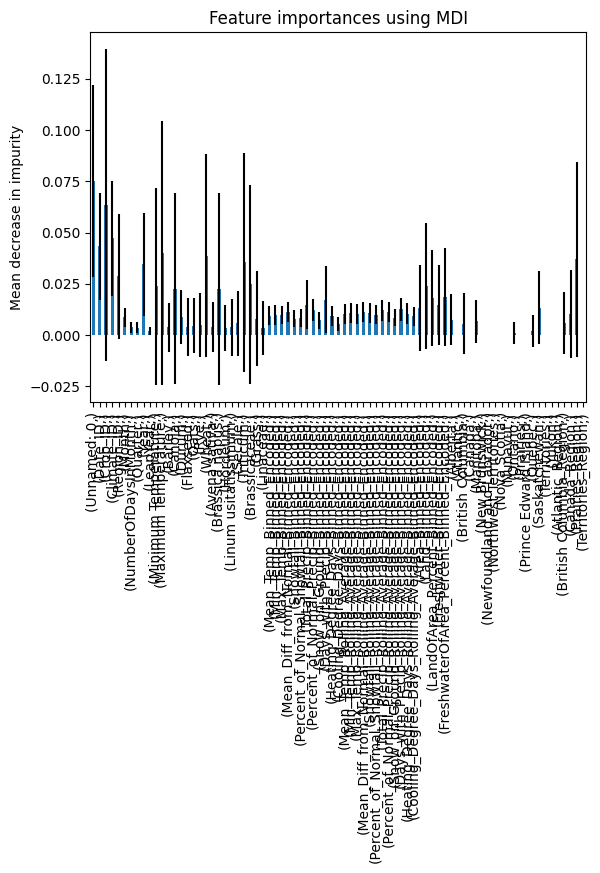

In [77]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [82]:
print(classifier.estimators_)

[DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       random_state=1608637542), DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       random_state=1273642419), DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       random_state=1935803228), DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       random_state=787846414), DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       random_state=996406378), DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       random_state=1201263687), DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       random_state=423734972), DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       rand

In [85]:
%pip install pydotplus


                                              0.0/278.7 kB ? eta -:--:--
     --                                       20.5/278.7 kB ? eta -:--:--
     ---------                             71.7/278.7 kB 991.0 kB/s eta 0:00:01
     -------------                        102.4/278.7 kB 980.4 kB/s eta 0:00:01
     ---------------------                163.8/278.7 kB 893.0 kB/s eta 0:00:01
     --------------------------           204.8/278.7 kB 958.4 kB/s eta 0:00:01
     --------------------------           204.8/278.7 kB 958.4 kB/s eta 0:00:01
     ---------------------------          215.0/278.7 kB 689.6 kB/s eta 0:00:01
     ------------------------------------ 278.7/278.7 kB 818.4 kB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproje


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import pydotplus 

In [17]:
from sklearn import tree

In [ ]:
dtree = classifier.estimators_[0]
tree.plot_tree(dtree)

In [22]:
fig = plt.figure(figsize=(300,200))
_ = tree.plot_tree(dtree, 
                   feature_names=X_train.columns,
                   filled=True)

In [18]:
data = tree.export_graphviz(dtree, out_file=None, feature_names=X_train.columns, node_ids=True)
graph = pydotplus.graph_from_dot_data(data)
graph.set_size('"100,100!"')
graph.write_png('rf_tree1.png')

InvocationException: GraphViz's executables not found

In [101]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(dtree, out_file="rf_tree0.dot")
with open("rf_tree0.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [102]:
from sklearn.tree import convert_to_graphviz
convert_to_graphviz(dtree)

ImportError: cannot import name 'convert_to_graphviz' from 'sklearn.tree' (c:\Users\daniel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\__init__.py)

# Tree Visualization 


